In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('chipotle.tsv', sep='\t')

#1. Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.
##Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [3]:
df.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


##В таблице 4622 строки, столбцы - id заказа, количество, название блюда и состав, а также цена предмета
##Эта таблица - заказы и их содержимое

#2. Ответьте на вопросы:
##Сколько заказов попало в выборку?
##Сколько уникальных категорий товара было куплено? (item_name)

In [4]:
all_items = df['item_name'].unique()
all_orders = df['order_id'].unique()

In [5]:
all_items

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [6]:
print(len(all_items), len(all_orders))

50 1834


##В выборке 1834 заказов и 50 товаров

#3. Есть ли в данных пропуски? В каких колонках? - В рецепте

In [7]:
Nan_1 = df['order_id'].isnull().any()
Nan_2 = df['quantity'].isnull().any()
Nan_3 = df['item_name'].isnull().any()
Nan_4 = df['choice_description'].isnull().any()
Nan_5 = df['item_price'].isnull().any()
Nan_1, Nan_2, Nan_3, Nan_4, Nan_5

(np.False_, np.False_, np.False_, np.True_, np.False_)

##Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [8]:
df = df.fillna('')

In [9]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


#4. Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.
##Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).


##Какая средняя/минимальная/максимальная цена у товара?


##Удалите старую колонку с ценой.

In [10]:
prices = df['item_price'].apply(lambda price: float(price[1:]))
prices.head()

,item_price
0,2.39
1,3.39
2,3.39
3,2.39
4,16.98


In [11]:
df['price'] = prices
df.head()

,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [12]:
float(df['price'].mean()), df['price'].min(), df['price'].max()

(7.464335785374297, 1.09, 44.25)

In [13]:
df.drop('item_price', axis=1, inplace=True)
df.head()

,order_id,quantity,item_name,choice_description,price
0,1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


#5. Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)
##Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [14]:
price = df.groupby('item_name')['price'].min()
price

,price
item_name,
6 Pack Soft Drink,6.49
Barbacoa Bowl,8.69
Barbacoa Burrito,8.69
Barbacoa Crispy Tacos,8.99
Barbacoa Salad Bowl,9.39
Barbacoa Soft Tacos,8.99
Bottled Water,1.09
Bowl,7.40
Burrito,7.40


In [15]:
price = price.sort_values(ascending=True)
price.head()

,price
item_name,
Bottled Water,1.09
Canned Soda,1.09
Canned Soft Drink,1.25
Side of Chips,1.69
Chips,1.99


In [16]:
price.tail()

,price
item_name,
Barbacoa Soft Tacos,8.99
Barbacoa Crispy Tacos,8.99
Carnitas Salad Bowl,9.39
Barbacoa Salad Bowl,9.39
Steak Salad Bowl,9.39


#6. Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [17]:
ch = df[df['item_name'] == 'Chicken Bowl'].groupby('item_name')['quantity']
ch.value_counts()

item_name     quantity
Chicken Bowl  1           693
              2            31
              3             2
Name: count, dtype: int64

##Ответ - 33

#7. Какой средний чек у заказа? Сколько в среднем товаров покупают?

In [18]:
av = df.groupby('order_id')['price'].sum()
av

,price
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


In [19]:
float(av.mean())

18.811428571428568

##18.81 - средняя цена заказа

In [20]:
av = df.groupby('order_id')['quantity'].sum()
av

,quantity
order_id,
1,4
2,2
3,2
4,2
5,2
...,...
1830,2
1831,3
1832,2


In [21]:
float(av.mean())

2.711014176663032

##2.71 - среднее количество товаров в заказе

#8. Сколько заказов содержали ровно 1 товар?

In [22]:
av = df[df['quantity'] < 2].groupby('order_id')['quantity'].value_counts()
av[av == 1]

,,count
order_id,quantity,
9,1,1
23,1,1
59,1,1
66,1,1
67,1,1
...,...,...
1572,1,1
1589,1,1
1671,1,1


##102

In [23]:
len(av)

1760

#9. Какая самая популярная категория товара?

In [24]:
m = df.groupby('item_name')['quantity'].sum()
m

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,211
Bowl,4
Burrito,6


In [25]:
max(m)

761

#10. Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой?

In [26]:
c = 0
burritos = []
for item in all_items:
  if 'Burrito' in item:
    c += 1
    burritos.append(item)
c

6

In [27]:
burritos

['Steak Burrito',
 'Chicken Burrito',
 'Barbacoa Burrito',
 'Carnitas Burrito',
 'Veggie Burrito',
 'Burrito']

In [28]:
dfb = df[df['item_name'].isin(burritos)]
dfb

,order_id,quantity,item_name,choice_description,price
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",8.49
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.49
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",8.99
...,...,...,...,...,...
4608,1829,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75


In [29]:
m = dfb.groupby('item_name')['quantity'].sum()
m

,quantity
item_name,
Barbacoa Burrito,91
Burrito,6
Carnitas Burrito,60
Chicken Burrito,591
Steak Burrito,386
Veggie Burrito,97


In [30]:
max(m)

591

In [31]:
p = df[df['item_name'].isin(burritos)].groupby('item_name')['price'].min()
p

,price
item_name,
Barbacoa Burrito,8.69
Burrito,7.40
Carnitas Burrito,8.69
Chicken Burrito,8.19
Steak Burrito,8.69
Veggie Burrito,8.49


In [32]:
min(p)

7.4

##Виды буррито: 'Steak Burrito',
 'Chicken Burrito',
 'Barbacoa Burrito',
 'Carnitas Burrito',
 'Veggie Burrito',
 'Burrito'

## Чаще всего берут куриный - 591

 ##самый дешевый - обычный - 7.4 USD

#11. В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

In [33]:
av = df.groupby('order_id')['price'].transform('sum')

df['sum_price'] = av

df

,order_id,quantity,item_name,choice_description,price,sum_price
0,1,1,Chips and Fresh Tomato Salsa,,2.39,11.56
1,1,1,Izze,[Clementine],3.39,11.56
2,1,1,Nantucket Nectar,[Apple],3.39,11.56
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,11.56
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,23.50
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,23.50
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,28.75
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,28.75


In [34]:
quantity_40 = df[df['price'] > 0.4 * df['sum_price']].groupby('order_id').sum()
quantity_40

,quantity,item_name,choice_description,price,sum_price
order_id,,,,,
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98
3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,12.67
4,2,Steak BurritoSteak Soft Tacos,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",21.00,42.00
5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,13.70
6,2,Chicken Crispy TacosChicken Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",17.50,35.00
...,...,...,...,...,...
1829,2,Steak BurritoVeggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, S...",23.00,48.50
1830,2,Steak BurritoVeggie Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",23.00,46.00
1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",9.25,12.90


In [35]:
len(quantity_40)

1624

##1624 заказа

#12.  Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [36]:
diet_coke_rows = df[df['choice_description'].str.contains('Diet Coke')]
diet_coke_rows

,order_id,quantity,item_name,choice_description,price,sum_price
162,73,2,Canned Soda,[Diet Coke],2.18,21.65
200,89,1,Canned Soda,[Diet Coke],1.09,16.06
317,138,1,Canned Soda,[Diet Coke],1.09,10.67
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49,30.94
350,150,2,Canned Soda,[Diet Coke],2.18,13.06
...,...,...,...,...,...,...
4527,1800,1,6 Pack Soft Drink,[Diet Coke],6.49,19.69
4545,1806,1,Canned Soft Drink,[Diet Coke],1.25,13.00
4571,1817,1,Canned Soft Drink,[Diet Coke],1.25,13.00
4585,1823,1,Canned Soft Drink,[Diet Coke],1.25,12.15


#13. Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [37]:
matrix = [
    ['Убийственный класс', '(комедия/боевик)'],
    ['Стальной Алхимик: Братство', '(боевик)'],
    ['Саики Кусуо', '(комедия)'],
    ['Твоя апрельская ложь', '(романтика/драма)'],
    ['Нитидзё', '(комедия)'],
    ['Steins;Gate', '(фантастика/триллер)'],
    ['Хоримия', '(романтика)'],
    ['Моя геройская академия', '(комедия/боевик)'],
    ['Fate/Zero', '(триллер/боевик)'],
    ['Корзинка фруктов', '(романтика)'],
    ['Плутон', '(триллер/боевик)'],
    ['Галактика Татами', '(комедия/фантастика)'],
    ['Атака титанов', '(боевик/триллер)'],
    ['Ковбой Бибоп', '(фантастика/боевик)'],
    ['Шова Генроку Ракуго Синдзю', '(драма)']
]

In [38]:
matrix = np.matrix(matrix)
matrix = matrix.T
matrix

matrix([['Убийственный класс', 'Стальной Алхимик: Братство',
         'Саики Кусуо', 'Твоя апрельская ложь', 'Нитидзё', 'Steins;Gate',
         'Хоримия', 'Моя геройская академия', 'Fate/Zero',
         'Корзинка фруктов', 'Плутон', 'Галактика Татами',
         'Атака титанов', 'Ковбой Бибоп', 'Шова Генроку Ракуго Синдзю'],
        ['(комедия/боевик)', '(боевик)', '(комедия)',
         '(романтика/драма)', '(комедия)', '(фантастика/триллер)',
         '(романтика)', '(комедия/боевик)', '(триллер/боевик)',
         '(романтика)', '(триллер/боевик)', '(комедия/фантастика)',
         '(боевик/триллер)', '(фантастика/боевик)', '(драма)']],
       dtype='<U26')

In [39]:
column1 = matrix[0].tolist()[0]
column2 = matrix[1].tolist()[0]
column1, column2

(['Убийственный класс',
  'Стальной Алхимик: Братство',
  'Саики Кусуо',
  'Твоя апрельская ложь',
  'Нитидзё',
  'Steins;Gate',
  'Хоримия',
  'Моя геройская академия',
  'Fate/Zero',
  'Корзинка фруктов',
  'Плутон',
  'Галактика Татами',
  'Атака титанов',
  'Ковбой Бибоп',
  'Шова Генроку Ракуго Синдзю'],
 ['(комедия/боевик)',
  '(боевик)',
  '(комедия)',
  '(романтика/драма)',
  '(комедия)',
  '(фантастика/триллер)',
  '(романтика)',
  '(комедия/боевик)',
  '(триллер/боевик)',
  '(романтика)',
  '(триллер/боевик)',
  '(комедия/фантастика)',
  '(боевик/триллер)',
  '(фантастика/боевик)',
  '(драма)'])

In [40]:
df_anime = pd.DataFrame({
    'index': [i+1 for i in range(len(column1))],
    'column1': column1,
    'column2': column2
}, )
df_anime

,index,column1,column2
0,1,Убийственный класс,(комедия/боевик)
1,2,Стальной Алхимик: Братство,(боевик)
2,3,Саики Кусуо,(комедия)
3,4,Твоя апрельская ложь,(романтика/драма)
4,5,Нитидзё,(комедия)
5,6,Steins;Gate,(фантастика/триллер)
6,7,Хоримия,(романтика)
7,8,Моя геройская академия,(комедия/боевик)
8,9,Fate/Zero,(триллер/боевик)
9,10,Корзинка фруктов,(романтика)


#2. Визуализации и matplotlib

In [41]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=np.random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
df['date'] = df.order_id.map(dates['date'])

In [42]:
df.head(15)

,order_id,quantity,item_name,choice_description,price,sum_price,date
0,1,1,Chips and Fresh Tomato Salsa,,2.39,11.56,2018-01-10
1,1,1,Izze,[Clementine],3.39,11.56,2018-01-10
2,1,1,Nantucket Nectar,[Apple],3.39,11.56,2018-01-10
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,11.56,2018-01-10
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98,2018-01-12
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,12.67,2018-01-30
6,3,1,Side of Chips,,1.69,12.67,2018-01-30
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,21.00,2018-01-16
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,21.00,2018-01-16
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,13.70,2018-01-02


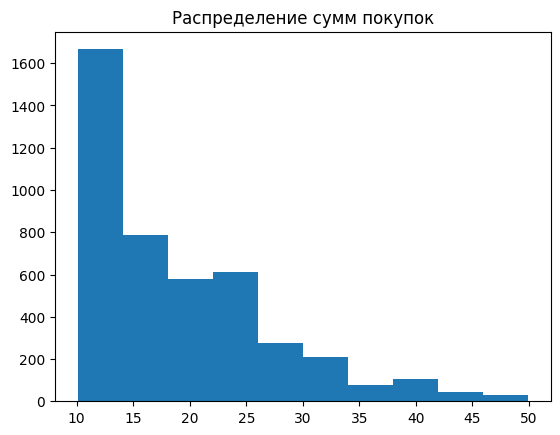

In [43]:
plt.hist(df[df['sum_price'] < 50]['sum_price'])
plt.title("Распределение сумм покупок")
plt.show()

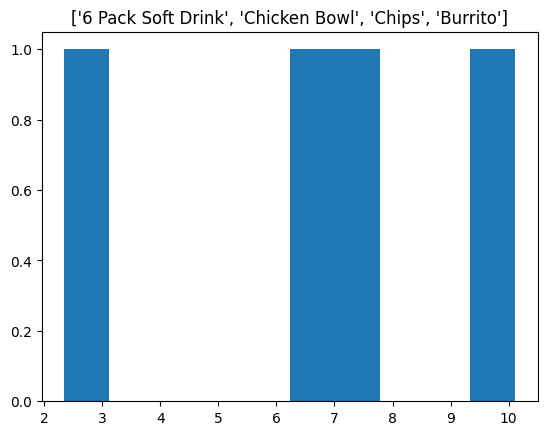

In [99]:
items_list = ['6 Pack Soft Drink', 'Chicken Bowl', 'Chips', 'Burrito']
# plt.hist(df[df['item_name'].isin(items_list)].groupby('item_name')['price'].mean())
plt.hist([(df[df['item_name'] == name]['price'].mean()) for name in items_list])
plt.title(r"['6 Pack Soft Drink', 'Chicken Bowl', 'Chips', 'Burrito']")
plt.show()

In [45]:
[(df[df['item_name'] == name]['price'].mean()) for name in items_list]

[np.float64(6.610185185185186),
 np.float64(10.113953168044079),
 np.float64(2.3428436018957344),
 np.float64(7.3999999999999995)]

#2. Постройте график зависимости суммы покупок от дней.

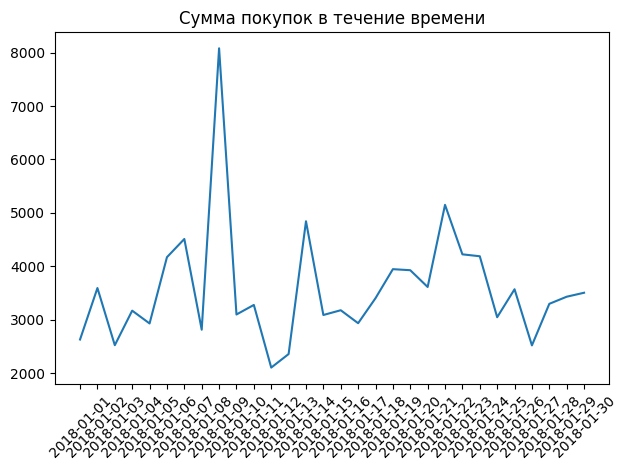

In [58]:
dr = df.groupby(df['date'])['sum_price'].sum()
plt.plot(dr)
plt.title("Сумма покупок в течение времени")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#3. Постройте средних сумм покупок по дням недели (bar plot).

In [59]:
import datetime as dt

In [96]:
dr = df.groupby(pd.to_datetime(df['date']).dt.dayofweek)['sum_price'].mean()
dr = dr.reset_index()
dr

,date,sum_price
0,0,22.848518
1,1,25.838581
2,2,21.456195
3,3,21.859729
4,4,21.678566
5,5,22.486638
6,6,24.682883


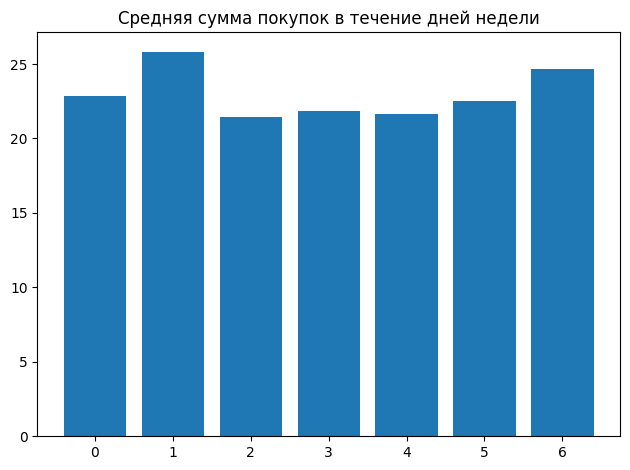

In [97]:
plt.bar(dr['date'], dr['sum_price'])
plt.title("Средняя сумма покупок в течение дней недели")
plt.tight_layout()
plt.show()

# 4. Постройте график зависимости денег за товар от купленного количества (scatter plot).

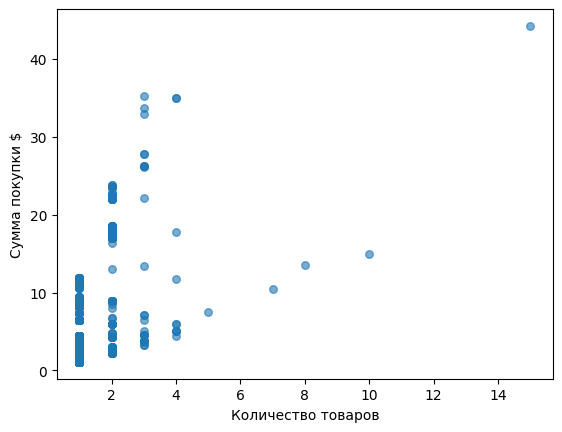

In [105]:
plt.scatter(df['quantity'], df['price'], alpha=0.6, s=30)
plt.xlabel('Количество товаров')
plt.ylabel('Сумма покупки $')
plt.savefig('scatter_plot.pdf')
plt.show()